# 03a - Data Augmentation & Balancing

This notebook balances the training set using three sources:
1. **External HuggingFace datasets** (real human-written text)
2. **nlpaug augmentation** (synonym replacement, insert, delete, back-translation)
3. **Template-generated sentences** (capped at 15% of deficit)

Only the **training set** is augmented. Validation and test sets remain untouched.

In [1]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config.params import LABEL_NAMES, PLOT_PALETTE, SENTIMENT_COLORS
from config.paths import SPLITS_DIR, AUGMENTED_TRAIN_CSV
from src.data import FinancialDataAugmentor

print(f"Project root: {project_root}")

Project root: C:\Users\seliv\OneDrive\Desktop\Financial Sentiment Analysis


## 1. Load Original Training Set

In [2]:
# Load the original training split
train_df = pd.read_csv(project_root / 'data' / 'splits' / 'train.csv')

print(f"Original training samples: {len(train_df)}")
print(f"\nLabel distribution:")
for label_id in sorted(train_df['label'].unique()):
    count = (train_df['label'] == label_id).sum()
    name = LABEL_NAMES[label_id]
    pct = count / len(train_df) * 100
    print(f"  {name}: {count} ({pct:.1f}%)")

display(train_df.head())

Original training samples: 2417

Label distribution:
  negative: 294 (12.2%)
  neutral: 1502 (62.1%)
  positive: 621 (25.7%)


,sentence,label,split,label_name,data_version,agreement_level
0,Nokia was up 0.12 pct to 16.70 eur after kicki...,2,train,positive,1.0.0,sentences_75agree
1,CEO Erkki J+�rvinen is happy with the company ...,2,train,positive,1.0.0,sentences_75agree
2,Finnlines estimated in its annual general meet...,0,train,negative,1.0.0,sentences_75agree
3,( A spokesperson told WWD to expect a 50-50 mi...,1,train,neutral,1.0.0,sentences_75agree
4,SAMPO PLC Jarmo Salonen Head of Investor Relat...,1,train,neutral,1.0.0,sentences_75agree


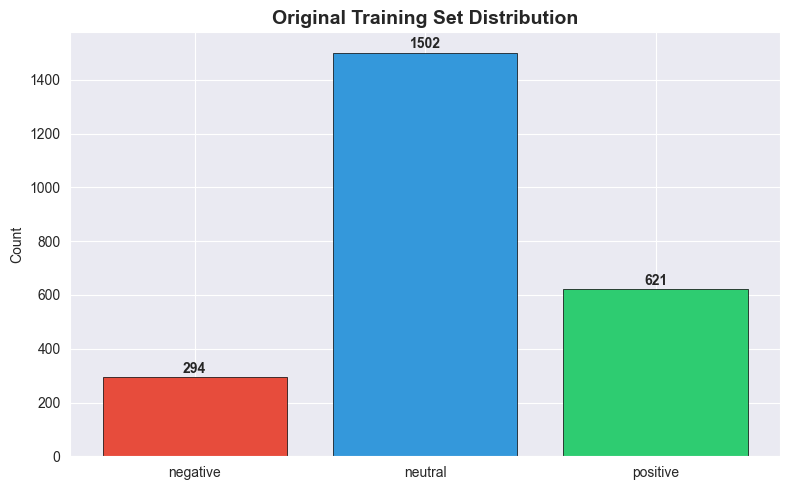

In [3]:
# Visualize original distribution
fig, ax = plt.subplots(figsize=(8, 5))
counts = train_df['label'].value_counts().sort_index()
labels = [LABEL_NAMES[i] for i in counts.index]
colors = [SENTIMENT_COLORS[LABEL_NAMES[i]] for i in counts.index]

ax.bar(labels, counts.values, color=colors, edgecolor='black', linewidth=0.5)
for i, v in enumerate(counts.values):
    ax.text(i, v + 15, str(v), ha='center', fontweight='bold')
ax.set_title('Original Training Set Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

## 2. Run Augmentation Pipeline

In [4]:
augmentor = FinancialDataAugmentor(seed=42)

# Balance the training set (target = majority class count)
balanced_df = augmentor.balance_training_set(train_df)

print(f"\nBalanced training samples: {len(balanced_df)}")
print(f"\nLabel distribution:")
for label_id in sorted(balanced_df['label'].unique()):
    count = (balanced_df['label'] == label_id).sum()
    name = LABEL_NAMES[label_id]
    pct = count / len(balanced_df) * 100
    print(f"  {name}: {count} ({pct:.1f}%)")

'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /datasets/takala/financial_phrasebank/resolve/main/data/FinancialPhraseBank-v1.0.zip (Caused by ConnectTimeoutError(<HTTPSConnection(host='huggingface.co', port=443) at 0x292d8be96a0>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: 0b73fc77-eed8-41f7-aaca-f82edf1602ad)')' thrown while requesting HEAD https://huggingface.co/datasets/takala/financial_phrasebank/resolve/main/data/FinancialPhraseBank-v1.0.zip
Retrying in 1s [Retry 1/5].
'(MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /datasets/takala/financial_phrasebank/resolve/main/data/FinancialPhraseBank-v1.0.zip (Caused by ConnectTimeoutError(<HTTPSConnection(host='huggingface.co', port=443) at 0x292d8c14a50>, 'Connection to huggingface.co timed out. (connect timeout=10)'))"), '(Request ID: eb63b1d5-4e74-4387-b76d-4388e7c7af53)')' thrown while req

README.md: 0.00B [00:00, ?B/s]

C:\Users\seliv\OneDrive\Desktop\Financial Sentiment Analysis\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\seliv\.cache\huggingface\hub\datasets--zeroshot--twitter-financial-news-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Could not load Twitter dataset: BuilderConfig 'sentiment' 

config.json: 0.00B [00:00, ?B/s]

C:\Users\seliv\OneDrive\Desktop\Financial Sentiment Analysis\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\seliv\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-de. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

C:\Users\seliv\OneDrive\Desktop\Financial Sentiment Analysis\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\seliv\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-de-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Back-translation unavailable: This tokenizer cannot be instantiated. Please make sure you have `sentencepiece` installed in order to use this tokenizer.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seliv\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seliv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seliv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seliv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloadin


Balanced training samples: 4506

Label distribution:
  negative: 1502 (33.3%)
  neutral: 1502 (33.3%)
  positive: 1502 (33.3%)


## 3. Quality Checks

In [5]:
# Source breakdown
print("Samples by source:")
print(balanced_df['source'].value_counts().to_string())

print("\n" + "="*80)
print("Sample examples from each source:")
print("="*80)

for source in balanced_df['source'].unique():
    subset = balanced_df[balanced_df['source'] == source]
    print(f"\n--- {source} ({len(subset)} samples) ---")
    samples = subset.sample(n=min(3, len(subset)), random_state=42)
    for _, row in samples.iterrows():
        print(f"  [{row['label_name']}] {row['sentence'][:120]}")

Samples by source:
source
original              2417
phrasebank_50agree    1052
template_generated     869
augmented_delete       168

Sample examples from each source:

--- original (2417 samples) ---
  [neutral] Symphony Services provides development services for Aldata GOLD .
  [positive] In 2008 , the deal is likely to bring savings of EUR 20mn-25mn .
  [positive] Technical indicators for the stock are bullish and S&P gives NOK a positive 4 STARS out of 5 buy ranking .

--- phrasebank_50agree (1052 samples) ---
  [negative] Loss for the period totalled EUR 15.6 mn compared to a profit of EUR 6.3 mn in 2008 .
  [positive] TeliaSonera is the leading telecommunications company in the Nordic and Baltic regions .
  [positive] ( Filippova ) A trilateral agreement on investment in the construction of a technology park in St Petersburg was to have

--- augmented_delete (168 samples) ---
  [negative] 25 March 2011 - Finnish electronics contract manufacturer Scanfil Oyj HEL: SCF1V said today

In [6]:
# Check for duplicates
n_dupes = balanced_df['sentence'].duplicated().sum()
print(f"Duplicate sentences: {n_dupes}")

# Check sentence length statistics by source
balanced_df['sent_len'] = balanced_df['sentence'].str.len()
print("\nSentence length statistics by source:")
print(balanced_df.groupby('source')['sent_len'].describe().round(1).to_string())
balanced_df.drop(columns='sent_len', inplace=True)

Duplicate sentences: 85

Sentence length statistics by source:
                     count   mean   std   min   25%    50%    75%    max
source                                                                  
augmented_delete     168.0  122.5  59.3  28.0  78.0  108.0  162.2  282.0
original            2417.0  125.6  57.3   9.0  81.0  116.0  162.0  306.0
phrasebank_50agree  1052.0  133.6  55.0  24.0  91.0  125.5  168.0  297.0
template_generated   869.0   61.5   7.1  45.0  57.0   61.0   66.0   93.0


## 4. Before / After Distribution

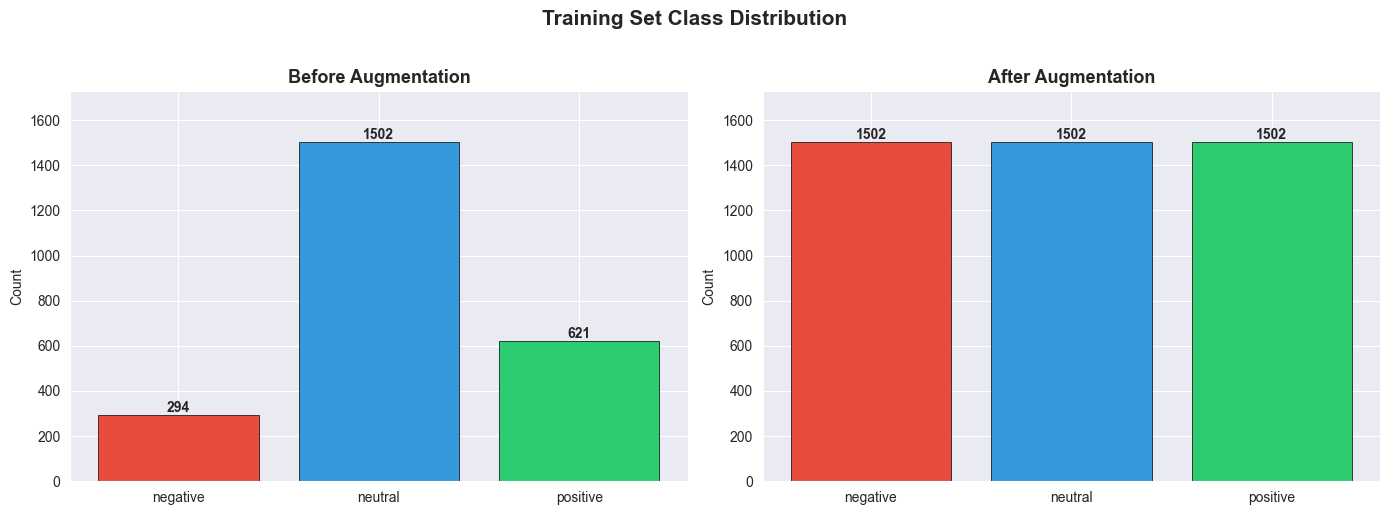

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
counts_before = train_df['label'].value_counts().sort_index()
labels_before = [LABEL_NAMES[i] for i in counts_before.index]
colors = [SENTIMENT_COLORS[LABEL_NAMES[i]] for i in counts_before.index]

axes[0].bar(labels_before, counts_before.values, color=colors, edgecolor='black', linewidth=0.5)
for i, v in enumerate(counts_before.values):
    axes[0].text(i, v + 15, str(v), ha='center', fontweight='bold')
axes[0].set_title('Before Augmentation', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, max(counts_before.values) * 1.15)

# After
counts_after = balanced_df['label'].value_counts().sort_index()
labels_after = [LABEL_NAMES[i] for i in counts_after.index]

axes[1].bar(labels_after, counts_after.values, color=colors, edgecolor='black', linewidth=0.5)
for i, v in enumerate(counts_after.values):
    axes[1].text(i, v + 15, str(v), ha='center', fontweight='bold')
axes[1].set_title('After Augmentation', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, max(counts_after.values) * 1.15)

plt.suptitle('Training Set Class Distribution', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

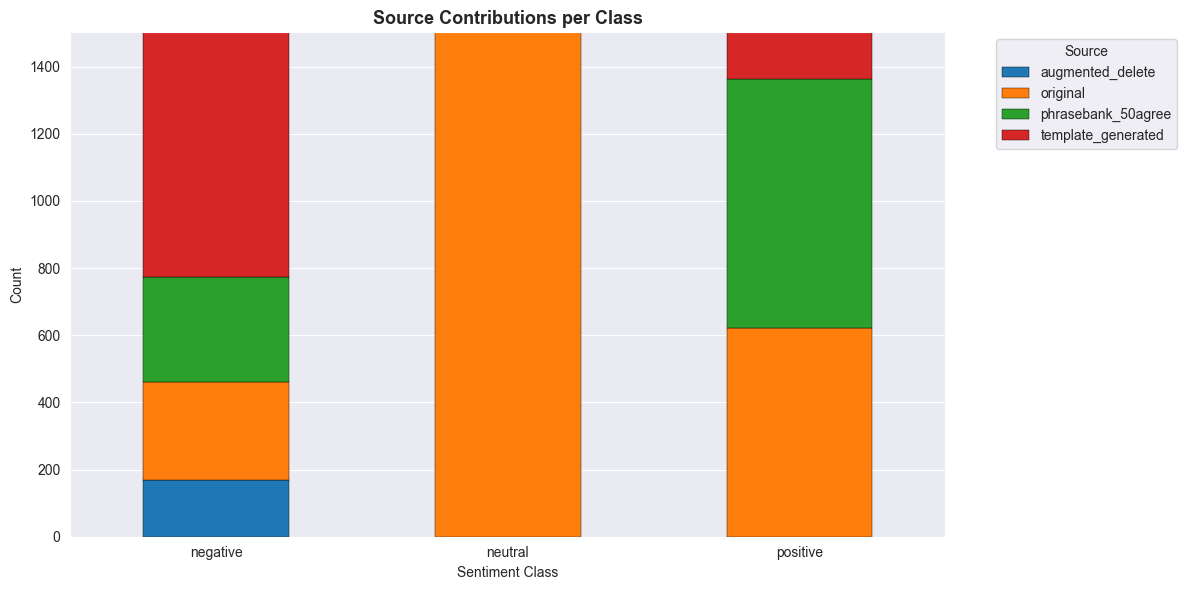

In [8]:
# Stacked bar: contribution of each source per class
source_label = balanced_df.groupby(['label', 'source']).size().unstack(fill_value=0)
source_label.index = [LABEL_NAMES[i] for i in source_label.index]

fig, ax = plt.subplots(figsize=(12, 6))
source_label.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', linewidth=0.3)
ax.set_title('Source Contributions per Class', fontsize=13, fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Sentiment Class')
ax.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Save Balanced Dataset

In [9]:
save_path = augmentor.save_augmented_dataset(balanced_df)
print(f"Balanced dataset saved to: {save_path}")
print(f"Total samples: {len(balanced_df)}")
print(f"\nFinal class distribution:")
print(balanced_df['label'].value_counts().sort_index())

Balanced dataset saved to: C:\Users\seliv\OneDrive\Desktop\Financial Sentiment Analysis\data\augmented\train_balanced.csv
Total samples: 4506

Final class distribution:
label
0    1502
1    1502
2    1502
Name: count, dtype: int64


In [10]:
# Verify saved file
verify_df = pd.read_csv(save_path)
print(f"Verified: {len(verify_df)} rows loaded from saved CSV")
print(f"Columns: {list(verify_df.columns)}")
print(f"\nLabel distribution:")
print(verify_df['label'].value_counts().sort_index())

Verified: 4506 rows loaded from saved CSV
Columns: ['sentence', 'label', 'label_name', 'source']

Label distribution:
label
0    1502
1    1502
2    1502
Name: count, dtype: int64
